<a href="https://colab.research.google.com/github/HARSHA0232/EDA-DIGTAL-ASSIGNMENT---1-/blob/main/Module_5_Clustering%20Algorithms%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 5 : Clustering Algorithms
21BDS0232 BAJJURI HARSHA VARDHAN


In [26]:
# Importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [9]:

# File path for the dataset
file_path = '/content/student-mat.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Define the numerical columns for clustering (based on your dataset structure)
numerical_columns = [
    'age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
    'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Convert scaled data back to a DataFrame for analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Display the scaled DataFrame (optional)
print(scaled_df.head())


        age  traveltime  studytime  failures    famrel  freetime     goout  \
0  1.023046    0.792251  -0.042286 -0.449944  0.062194 -0.236010  0.801479   
1  0.238380   -0.643249  -0.042286 -0.449944  1.178860 -0.236010 -0.097908   
2 -1.330954   -0.643249  -0.042286  3.589323  0.062194 -0.236010 -0.997295   
3 -1.330954   -0.643249   1.150779 -0.449944 -1.054472 -1.238419 -0.997295   
4 -0.546287   -0.643249  -0.042286 -0.449944  0.062194 -0.236010 -0.997295   

       Dalc      Walc    health  absences        G1        G2        G3  
0 -0.540699 -1.003789 -0.399289  0.036424 -1.782467 -1.254791 -0.964934  
1 -0.540699 -1.003789 -0.399289 -0.213796 -1.782467 -1.520979 -0.964934  
2  0.583385  0.551100 -0.399289  0.536865 -1.179147 -0.722415 -0.090739  
3 -0.540699 -1.003789  1.041070 -0.464016  1.234133  0.874715  1.002004  
4 -0.540699 -0.226345  1.041070 -0.213796 -1.480807 -0.190038 -0.090739  


Cluster Means:
                       age  traveltime  studytime  failures    famrel  \
KMeans_Cluster                                                         
0               16.462025    1.297468   2.221519  0.088608  3.974684   
1               16.758621    1.462069   2.048276  0.455172  3.972414   
2               17.000000    1.684783   1.695652  0.565217  3.847826   

                freetime     goout      Dalc      Walc    health  absences  \
KMeans_Cluster                                                               
0               3.139241  2.696203  1.120253  1.746835  3.462025  4.474684   
1               3.027586  2.958621  1.151724  1.820690  3.386207  5.703448   
2               3.728261  4.054348  2.619565  3.967391  3.978261  7.836957   

                       G1         G2         G3  
KMeans_Cluster                                   
0               13.854430  13.860759  14.113924  
1                8.262069   7.786207   6.793103  
2               10.021739   9.92

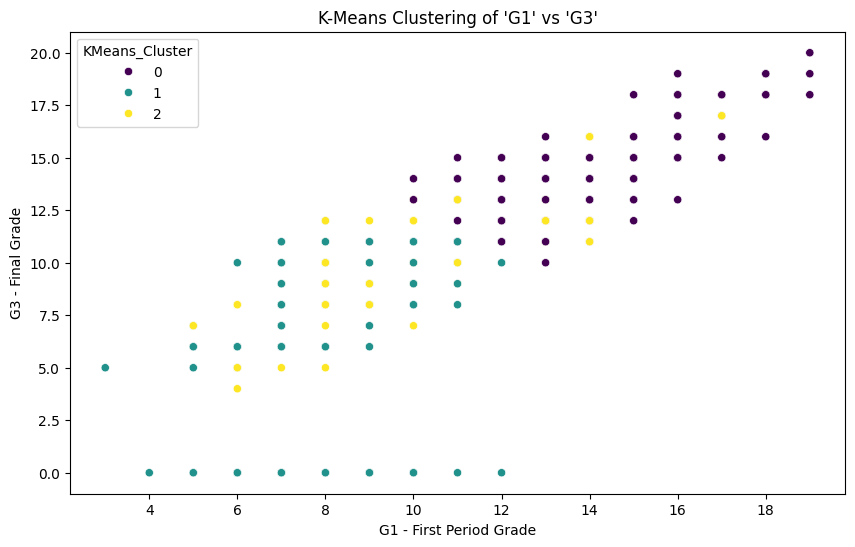

In [10]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Cluster Means Analysis
cluster_means = data.groupby('KMeans_Cluster')[numerical_columns].mean()
print("Cluster Means:\n", cluster_means)

# Visualizing K-Means Clusters (using 'G1' vs 'G3')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='G1', y='G3', hue='KMeans_Cluster', palette='viridis')
plt.title("K-Means Clustering of 'G1' vs 'G3'")
plt.xlabel("G1 - First Period Grade")
plt.ylabel("G3 - Final Grade")
plt.show()

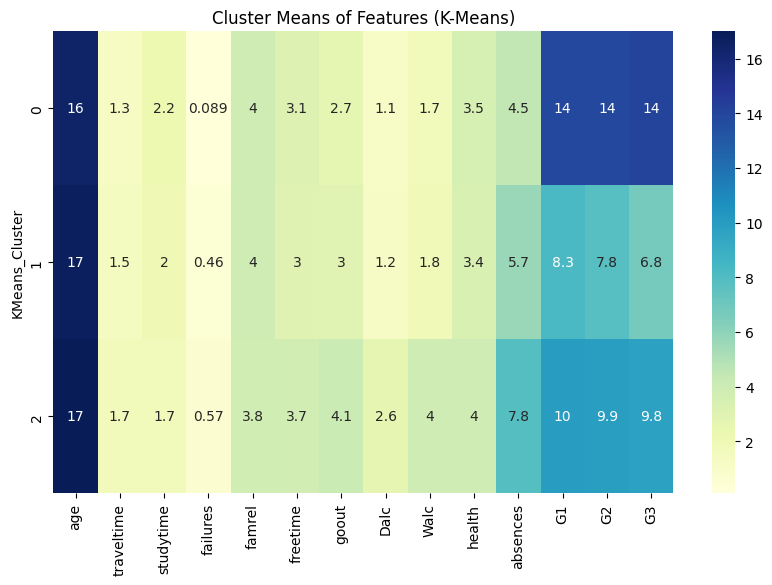

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Cluster Means of Features (K-Means)")
plt.show()

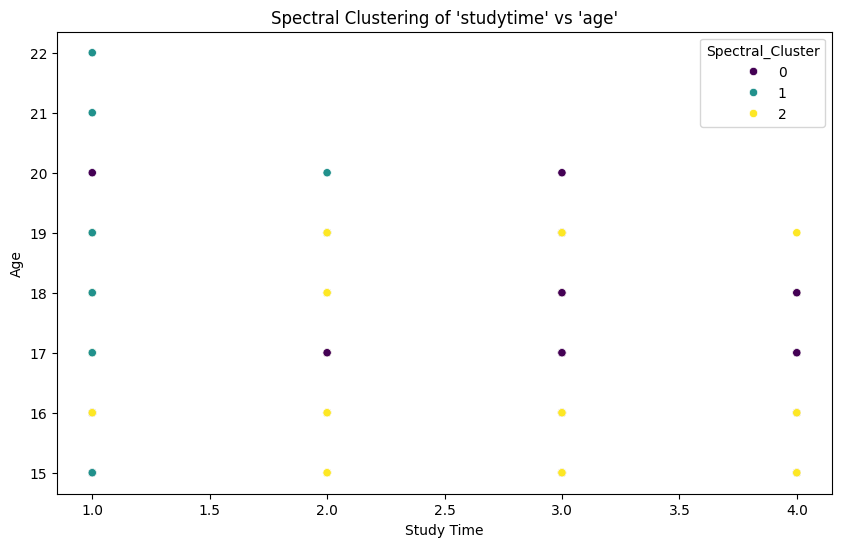

In [12]:
# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['Spectral_Cluster'] = spectral.fit_predict(scaled_data)

# Visualizing Spectral Clustering (using 'studytime' vs 'age')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='studytime', y='age', hue='Spectral_Cluster', palette='viridis')
plt.title("Spectral Clustering of 'studytime' vs 'age'")
plt.xlabel("Study Time")
plt.ylabel("Age")
plt.show()

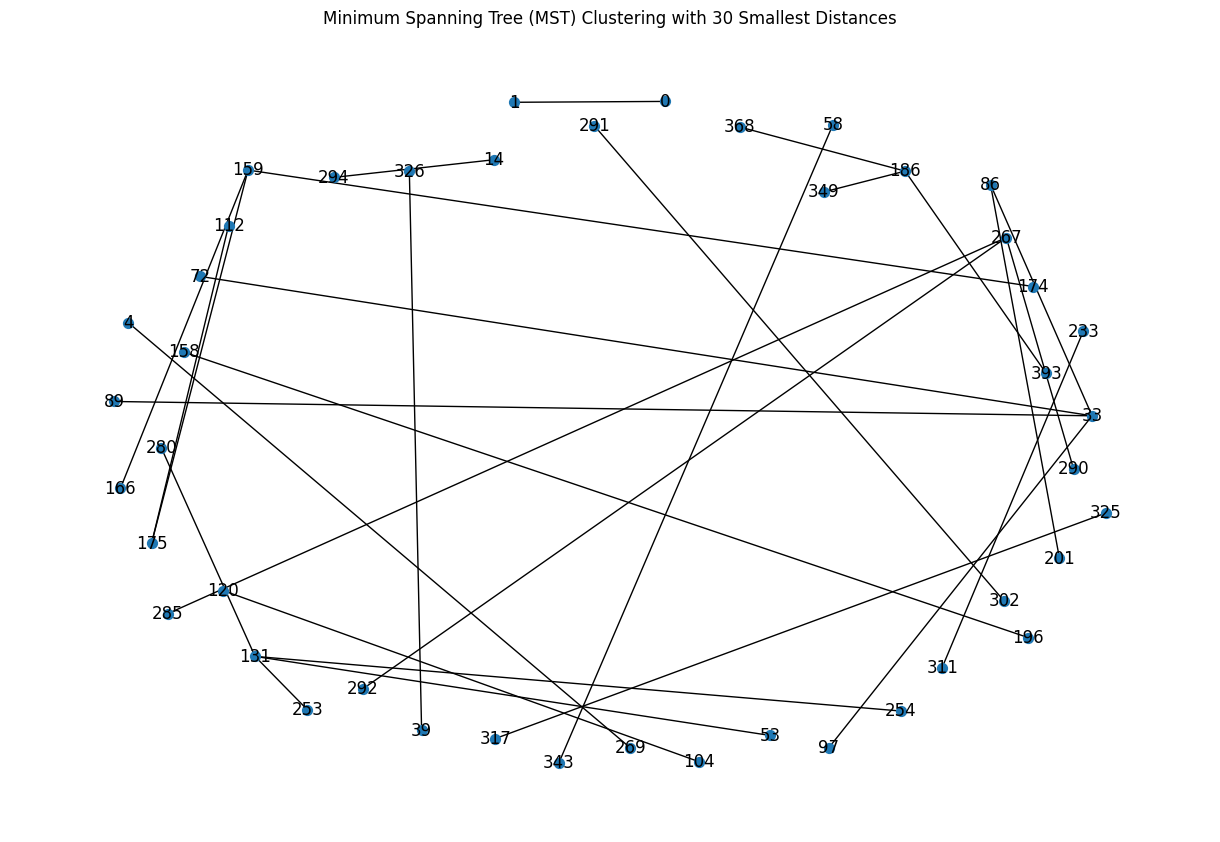

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Compute pairwise distances between selected numerical columns (studytime, G1)
selected_columns = ['studytime', 'G1']
distances = euclidean_distances(data[selected_columns])

# Flatten the distance matrix and get the indices of the smallest 30 distances
distances_flat = distances[np.triu_indices(len(distances), k=1)]  # Get upper triangular part to avoid duplicates
sorted_indices = np.argsort(distances_flat)[:30]  # Get indices of the 30 smallest distances

# Create the graph for MST & Computing it (using the smallest 30 distances)
G = nx.Graph()
for idx in sorted_indices:
    i, j = np.triu_indices(len(distances), k=1)[0][idx], np.triu_indices(len(distances), k=1)[1][idx]
    G.add_edge(i, j, weight=distances[i][j])

# Compute the MST
mst = nx.minimum_spanning_tree(G)

# Visualize the MST structure
plt.figure(figsize=(12, 8))
nx.draw(mst, with_labels=True, node_size=50, font_size=12)
plt.title("Minimum Spanning Tree (MST) Clustering with 30 Smallest Distances")
plt.show()


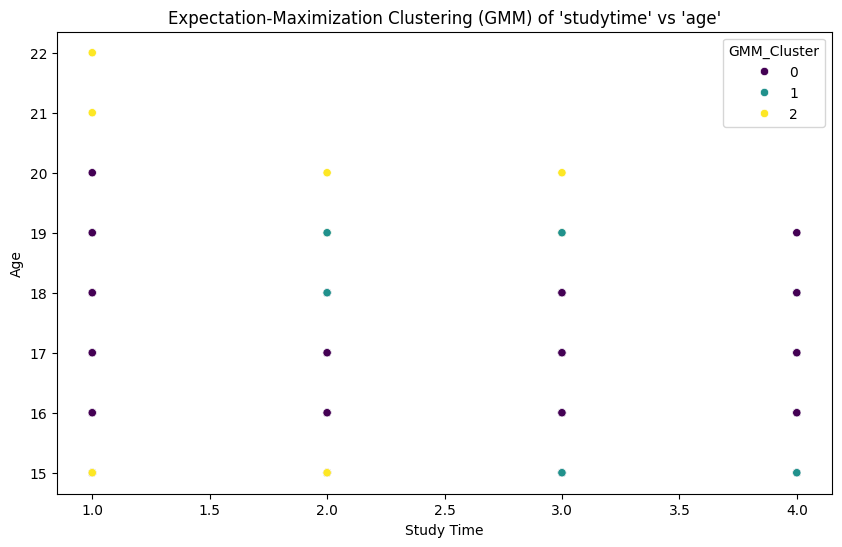

In [23]:
# Fit the GMM model with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(scaled_data)

# Visualize the GMM clusters using 'studytime' vs 'age'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='studytime', y='age', hue='GMM_Cluster', palette='viridis')
plt.title("Expectation-Maximization Clustering (GMM) of 'studytime' vs 'age'")
plt.xlabel("Study Time")
plt.ylabel("Age")
plt.show()

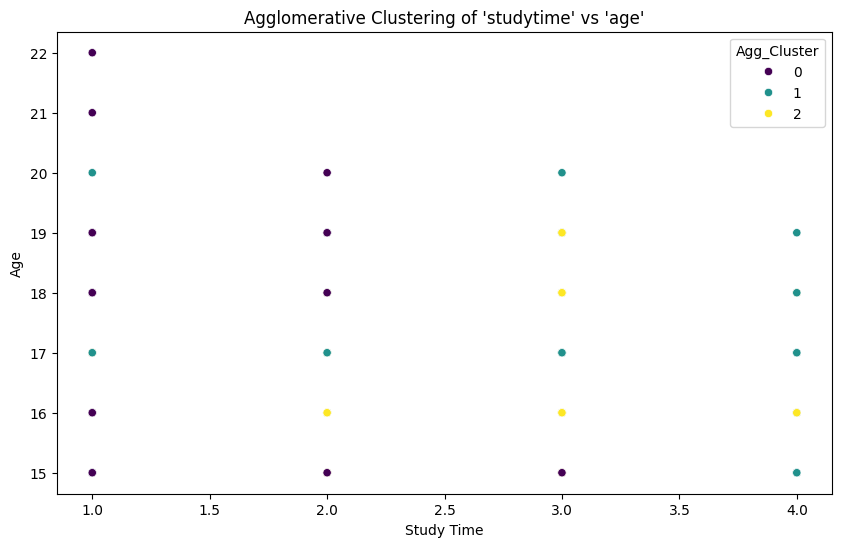

In [24]:
# Fit the Agglomerative Clustering model with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['Agg_Cluster'] = agg_clustering.fit_predict(scaled_data)

# Visualize the Agglomerative Clustering using 'studytime' vs 'age'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='studytime', y='age', hue='Agg_Cluster', palette='viridis')
plt.title("Agglomerative Clustering of 'studytime' vs 'age'")
plt.xlabel("Study Time")
plt.ylabel("Age")
plt.show()

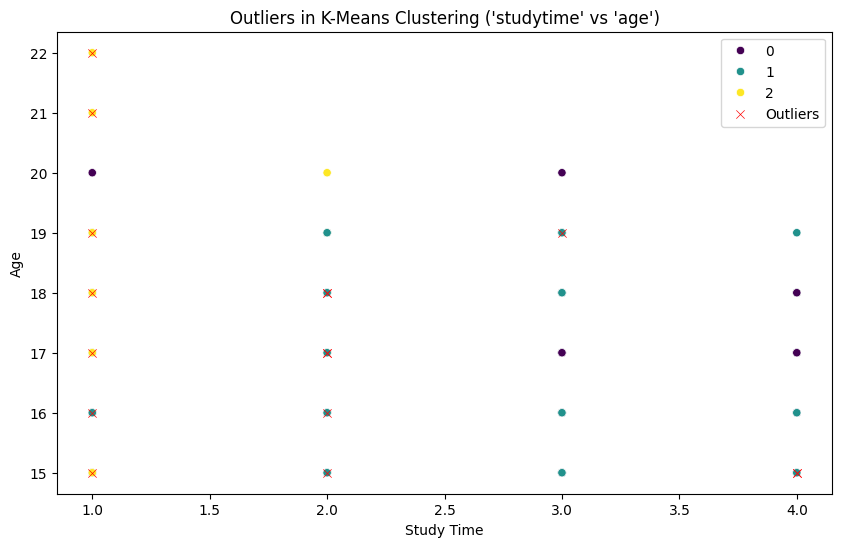

In [25]:
# Calculate distances to the centroid
distances_to_centroid = kmeans.transform(scaled_data).min(axis=1)

# Set the outlier threshold (mean + 2 * std deviation)
outlier_threshold = distances_to_centroid.mean() + 2 * distances_to_centroid.std()

# Identify the outliers based on the threshold
outliers = data[distances_to_centroid > outlier_threshold]

# Visualizing the outliers in the context of 'studytime' vs 'age'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='studytime', y='age', hue='KMeans_Cluster', palette='viridis')
sns.scatterplot(data=outliers, x='studytime', y='age', color='red', marker='x', label='Outliers')
plt.title("Outliers in K-Means Clustering ('studytime' vs 'age')")
plt.xlabel("Study Time")
plt.ylabel("Age")
plt.legend()
plt.show()